#What is the maximum Fare that was paid? And the median?

In [15]:
import pandas as pd
import numpy as np
# Load the data
#data = pd.read_csv('titanic.csv')
data = pd.read_excel("C:/Users/rammo/OneDrive/Desktop/titanic.xlsx")
# Calculate the maximum fare
max_fare = data['Fare'].max()
print("The maximum fare paid is: ", max_fare)
# Calculate the median fare
median_fare = data['Fare'].median()
print("The median fare paid is: ", median_fare)

# Calculate the average suvived
avarage_survived = data['Survived'].mean()
print("The average of survived is: ", avarage_survived)

The maximum fare paid is:  71.2833
The median fare paid is:  8.0
The average of survived is:  0.7142857142857143


What is the age distribution of the passengers? (titanic data)

<Axes: >

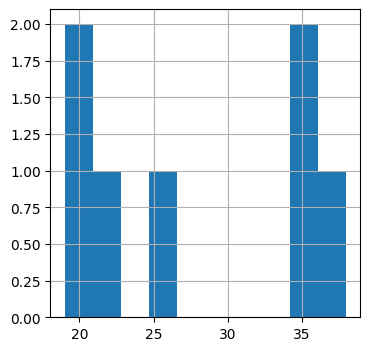

In [16]:
data['Age'].hist(figsize=(4,4))

How does the survival rate of the passengers differ between sexes?

In [18]:
data.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,1.000000
male,0.333333


How does it differ between the different classes?

<Axes: xlabel='Pclass'>

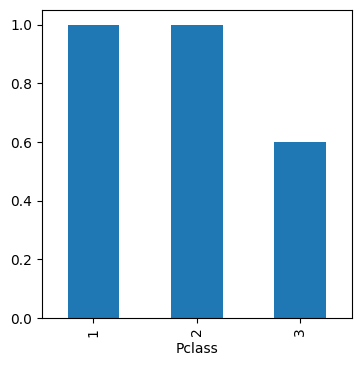

In [19]:
data.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar',figsize=(4,4))

Case 2: air quality measurement timeseries
AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [28]:
import pandas as pd

# URL to the Excel file


# Read Excel file into DataFrame
try:
    air_data = pd.read_excel("C:/Users/rammo/OneDrive/Desktop/air_quality.xlsx",
                         engine='openpyxl',   # Specify the engine (openpyxl or xlrd)
                         sheet_name='Sheet1',  # Specify the sheet name if necessary
                         skiprows=[1],         # Skip the second row (index 1)
                         na_values=['n/d'],    # Treat 'n/d' as NaN (missing data)
                         index_col=0,          # Use the first column as the index
                         parse_dates=True      # Parse dates in the DataFrame
                         )
    
    # Display the first few rows of the DataFrame
    print(air_data.head())

except Exception as e:
    print(f"Error reading Excel file from URL: {e}")


                     BASCH  BONAP  PA18  VERS
timestamp                                    
2000-01-01 02:00:00    104     60    77    42
2000-01-01 03:00:00     97     58    73    37
2000-01-01 04:00:00     77     52    57    33
2000-01-01 05:00:00     79     52    64    27


EXERCISE: Read the data/20000101_20161231-NO2.csv file into a DataFrame no2

Some aspects about the file:

1.Which separator is used in the file?

#It might be a comma (,), semicolon (;), tab (\t), or another character
import pandas as pd

# Example: CSV file with semicolon separator
#df = pd.read_csv('data.csv', sep=';')

# Example: CSV file with tab separator
#df = pd.read_csv('data.csv', sep='\t')

# Example: CSV file with whitespace around semicolon separator
#df = pd.read_csv('data.csv', sep=';', skipinitialspace=True)

"""If you need to specify a delimiter other than the default comma (,)
when reading a CSV file into a Pandas DataFrame,
you can use the delimiter parameter in pd.read_csv(). """
# Example: Reading CSV file with a custom delimiter
#df = pd.read_csv('data.csv', delimiter='/')

# Example: CSV file with whitespace around semicolon separator
df = pd.read_csv('data.csv', sep=';', skipinitialspace=True)
print(df)

2.The second row includes unit information and should be skipped (check `skiprows` keyword)
For missing values, it uses the `'n/d'` notation (check `na_values` keyword)

In [ ]:

import pandas as pd

# Example: Reading CSV file with skipping the second row and handling 'n/d' as NaN
df = pd.read_csv('data.csv', skiprows=[1], na_values='n/d')

# Display the DataFrame to verify
print(df)

#'n/d'treated as a NaN value in the DataFrame,missing or invalid data entries.

3.We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)

In [ ]:
#When you read a CSV or Excel file into a Pandas DataFrame using 
#read_csv() or read_excel()


import pandas as pd

# Example CSV file with dates
df = pd.read_csv('data.csv', parse_dates=True)

df = pd.read_csv('data.csv', parse_dates=['date_column'])

df = pd.read_csv('data.csv', parse_dates=[0, 1])  # Parses first and second columns as dates

#USES:Simplifies Date Handling,Time Series Analysis


EXERCISE:

Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers

In [ ]:
import pandas as pd

import numpy as np
df=pd.read_excel('C:/Users/rammo/OneDrive/Desktop/titanic.xlsx')

male=df['Sex']=='male'
female=df['Sex']=='female'
male_mean=male.mean()
female_mean=female.mean()

print(male_mean)
print(female_mean)



0.4
0.6


EXERCISE:

Based on the titanic data set, how many passengers older than 70 were on the Titanic?

In [ ]:
import pandas as pd
df=pd.read_excel('C:/Users/rammo/OneDrive/Desktop/titanic.xlsx')


older= df['Age']>70
print(df[older])

Empty DataFrame
Columns: [PassengerId, Survived, Survived.1, Pclass, Name, Sex, Age, sbsip, parch, Ticket, Fare, Cabin, Embarked]
Index: []


EXERCISE:

Calculate the average age for each sex again, but now using groupby.

In [ ]:
df=pd.read_excel('C:/Users/rammo/OneDrive/Desktop/titanic.xlsx')
df.groupby('Sex')['Age'].median()

Sex
female    35.0
male      28.5
Name: Age, dtype: float64

EXERCISE:

Calculate the average survival ratio for all passengers.

In [ ]:
df=pd.read_excel('C:/Users/rammo/OneDrive/Desktop/titanic.xlsx')
#print(df)
avarage_all=df['Survived'].mean()
print(avarage_all)

0.7142857142857143


EXERCISE:

Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).

In [ ]:
import pandas as pd
df=pd.read_excel('C:/Users/rammo/OneDrive/Desktop/titanic.xlsx')
below= df[df['Age'] < 25]
survival_below = below['Survived'].mean()
print("survival_below - ",survival_below)

survival_below -  0.5


What is the difference in the survival ratio between the sexes?

In [ ]:
import pandas as pd
df=pd.read_excel('C:/Users/rammo/OneDrive/Desktop/titanic.xlsx')
servivalbysex=df.groupby('Sex')['Survived'].mean()
print(servivalbysex)

Sex
female    1.000000
male      0.333333
Name: Survived, dtype: float64


How does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.

<Axes: >

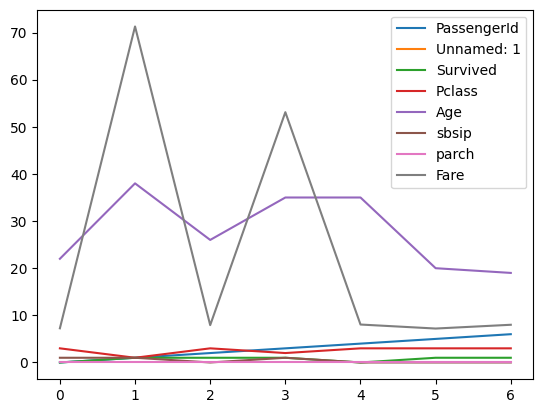

In [56]:
import pandas as pd
df=pd.read_excel('C:/Users/rammo/OneDrive/Desktop/titanic.xlsx')
df.plot()    

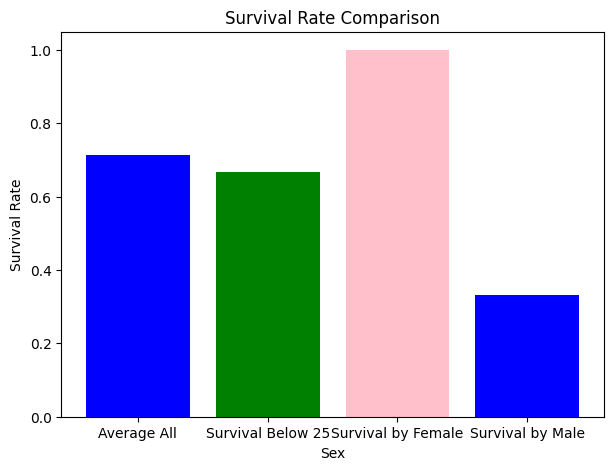

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_excel('C:/Users/rammo/OneDrive/Desktop/titanic.xlsx')

df = pd.DataFrame(data)

# Calculate average survival rate for all passengers
average_all = df['Survived'].mean()

# Calculate survival rate for passengers below 25 years old
below_25 = df[df['Age'] < 25]
survival_below = below_25['Survived'].mean()

# Calculate survival rate by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()

#Plotting
plt.figure(figsize=(7, 5))

# Create x-axis labels and corresponding heights
x_labels = ['Average All', 'Survival Below 25', 'Survival by Female', 'Survival by Male']
heights = [average_all, survival_below, survival_by_sex['female'], survival_by_sex['male']]

# Plotting the bar chart
plt.bar(x_labels[:2], heights[:2], color=['blue', 'green', 'pink'])
plt.bar(x_labels[2:], heights[2:], color=['pink', 'blue'])

plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Comparison')

plt.show()


Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.

In [ ]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
dates = pd.date_range('1999-01-01', periods=100, freq='D')
values = np.random.randint(0, 100, size=100)
data = pd.DataFrame({'value': values}, index=dates)

# Resample and plot
data['1999':].resample('M').mean().plot(ylim=[0, 120])
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Monthly Mean of Data from 1999 onwards')
plt.grid(True)
plt.show()


In [58]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


EXERCISE: Calculate the population numbers relative to Belgium

In [81]:
pop=df_countries['population']
print(pop[df_countries['country'] == 'Belgium'].values[0])
print()
print(pop[df_countries['country'] == 'Belgium'])


#values[0] This accesses the first (and only) value in the filtered Series,
# which is the population of Belgium.

11.3

0    11.3
Name: population, dtype: float64


EXERCISE: Calculate the population density for each country and add this as a new column to the dataframe.

In [92]:
#creating new variable for Density.
#use le6 or 1,000,000.
# Display the updated dataframe with new variable.
df_countries['population_density'] = df_countries['population'] / df_countries['area'] * 1e6

print(df_countries)

          country  population    area    capital  population_density
0         Belgium        11.3   30510   Brussels          370.370370
1          France        64.3  671308      Paris           95.783158
2         Germany        81.3  357050     Berlin          227.699202
3     Netherlands        16.9   41526  Amsterdam          406.973944
4  United Kingdom        64.9  244820     London          265.092721


EXERCISE: Select the capital and the population column of those countries where the density is larger than 300

In [98]:
#creating variable for 300 above.
selected_countries= df_countries[df_countries['population_density'] > 300]
#selecting columns
result = selected_countries[['capital', 'population']]
print(result)

     capital  population
0   Brussels        11.3
3  Amsterdam        16.9


 Add a column 'density_ratio' with the ratio of the density to the mean density
 

In [105]:
mean_density = df_countries['population_density'].mean()
#each density is computing with mean density to get density ratio.
df_countries['density_ratio'] =df_countries['population_density']/mean_density
print(df_countries)

          country  population    area    capital  population_density  \
0         Belgium        11.3   30510   Brussels          370.370370   
1          France        64.3  671308      Paris           95.783158   
2         Germany        81.3  357050     Berlin          227.699202   
3     Netherlands        16.9   41526  Amsterdam          406.973944   
4  United Kingdom        64.9  244820     London          265.092721   

   density_ratio  
0       1.355755  
1       0.350618  
2       0.833502  
3       1.489744  
4       0.970382  


 Change the capital of the UK to Cambridge

In [108]:
df_countries.loc[df_countries['country'] == 'United Kingdom', 'capital'] = 'Cambridge'
print(df_countries)

          country  population    area    capital  population_density  \
0         Belgium        11.3   30510   Brussels          370.370370   
1          France        64.3  671308      Paris           95.783158   
2         Germany        81.3  357050     Berlin          227.699202   
3     Netherlands        16.9   41526  Amsterdam          406.973944   
4  United Kingdom        64.9  244820  Cambridge          265.092721   

   density_ratio  
0       1.355755  
1       0.350618  
2       0.833502  
3       1.489744  
4       0.970382  


EXERCISE: Select all countries whose population density is between 100 and 300 people/km²

In [109]:
selected_countries = df_countries[(df_countries['population_density'] >= 100) & (df_countries['population_density'] <= 300)]

#to display selected columns use a list of column names within double square brackets [['column1', 'column2']].
print(selected_countries[['country', 'population_density']])

          country  population_density
2         Germany          227.699202
4  United Kingdom          265.092721


EXERCISE: Select all countries that have capital names with more than 7 characters
 

In [110]:
# Select countries where capital names have more than 7 characters
selected_countries = df_countries[df_countries['capital'].str.len() > 7]

# Display the selected countries
print(selected_countries[['country', 'capital']])

          country    capital
0         Belgium   Brussels
3     Netherlands  Amsterdam
4  United Kingdom  Cambridge


EXERCISE: Select all countries that have capital names that contain the character sequence 'am', 

In [112]:
df_countries['capital'].str.contains('am')

0    False
1    False
2    False
3     True
4     True
Name: capital, dtype: bool

EXERCISE: How many movies are listed in the titles dataframe?
 

In [5]:
import pandas as pd
cast = pd.read_excel('C:/Users/rammo/OneDrive/Desktop/title.xlsx')
cast.head()


,Unnamed: 0,title,year,name,type,character,n
0,0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
titles = pd.read_excel('C:/Users/rammo/OneDrive/Desktop/Cast.xlsx')
titles.head()

,Unnamed: 0,title,year,name,type,character,n
0,0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


EXERCISE: How many movies are listed in the titles dataframe?

In [8]:
num_movies = titles['title'].nunique()
print(num_movies)

5


EXERCISE: What are the earliest two films listed in the titles dataframe?

In [9]:
earliest_films = titles.sort_values(by='year').head(2)

print("Earliest two films listed:")
print(earliest_films[['title', 'year']])

Earliest two films listed:
             title  year
1  Suuri illusioni  1985
0   Closet Monster  2015


EXERCISE: How many movies have the title "Hamlet"?

In [10]:
num_hamlet_movies = titles[titles['title'] == 'Hamlet'].shape[0]
#shape[0] gives num of rows
print("Number of movies with title 'Hamlet':", num_hamlet_movies)

Number of movies with title 'Hamlet': 0


EXERCISE: List all of the "Treasure Island" movies from earliest to most recent.

In [11]:
num_movies = titles[titles['title'] == 'Treasure Island'].shape[0]
print(num_movies)

0


EXERCISE: How many movies were made from 1950 through 1959?

In [13]:
movies_1950s = titles[(titles['year'] >= 1950) & (titles['year'] <= 1959)]

# Count the number of movies in the 1950s
num_movies_1950s = len(movies_1950s)
print(num_movies_1950s)

0
